#**Exponential smoothing**



##  install these libraries using pip:



In [53]:
%%capture
!pip install pandas matplotlib

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing

## Loading dataset

In [55]:
data = pd.read_csv('/content/traffic.csv', parse_dates=['DateTime'], index_col='DateTime')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48120 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   ID        48120 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB
None


In [56]:
df = data.iloc[:500]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2015-11-01 00:00:00 to 2015-11-21 19:00:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  500 non-null    int64
 1   Vehicles  500 non-null    int64
 2   ID        500 non-null    int64
dtypes: int64(3)
memory usage: 15.6 KB


,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [57]:
df= df.drop(['Junction','ID'], axis=1)
df

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9
...,...
2015-11-21 15:00:00,18
2015-11-21 16:00:00,17
2015-11-21 17:00:00,17


## Visualizing the data





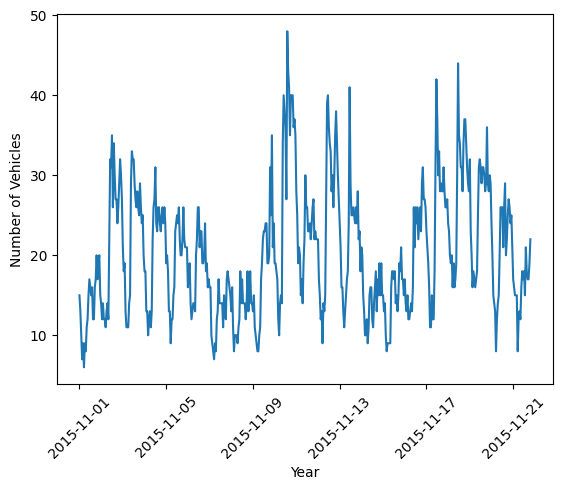

In [58]:
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

#**Single Exponential smoothing**





In [59]:
model = SimpleExpSmoothing(df)
model_single_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions





In [60]:
forecast_single = model_single_fit.forecast(6)
print(forecast_single)

2015-11-21 20:00:00    21.873341
2015-11-21 21:00:00    21.873341
2015-11-21 22:00:00    21.873341
2015-11-21 23:00:00    21.873341
2015-11-22 00:00:00    21.873341
2015-11-22 01:00:00    21.873341
Freq: H, dtype: float64


## Visualize Single Exponential Smoothing




In [61]:
forecast_single = model_single_fit.forecast(40)

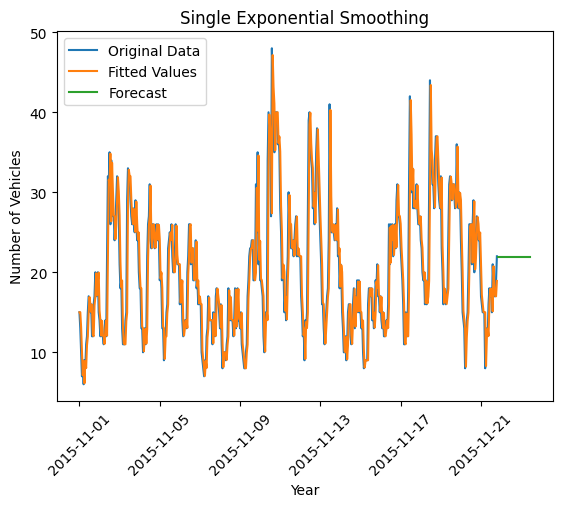

In [62]:
plt.plot(df, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Single Exponential Smoothing')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#**Double Exponential Smoothing**




In [63]:
model_double = Holt(df)
model_double_fit = model_double.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [64]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)

2015-11-21 20:00:00    21.927524
2015-11-21 21:00:00    21.938688
2015-11-21 22:00:00    21.949853
2015-11-21 23:00:00    21.961018
2015-11-22 00:00:00    21.972183
2015-11-22 01:00:00    21.983348
Freq: H, dtype: float64


## Visualize Double Exponential Smoothing




In [65]:
forecast_double = model_double_fit.forecast(40)

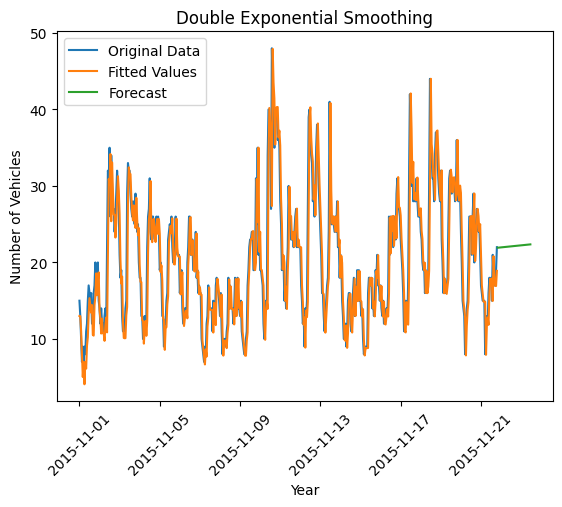

In [66]:
plt.plot(df, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Double Exponential Smoothing')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#**Holt-Winter’s Seasonal Smoothing**






In [67]:
# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    df, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [68]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

2015-11-21 20:00:00    21.899819
2015-11-21 21:00:00    24.411694
2015-11-21 22:00:00    27.021475
2015-11-21 23:00:00    27.021718
2015-11-22 00:00:00    25.460868
2015-11-22 01:00:00    23.080138
Freq: H, dtype: float64


## Visualize Triple Exponential Smoothing




In [69]:
forecast_triple = model_triple_fit.forecast(40)

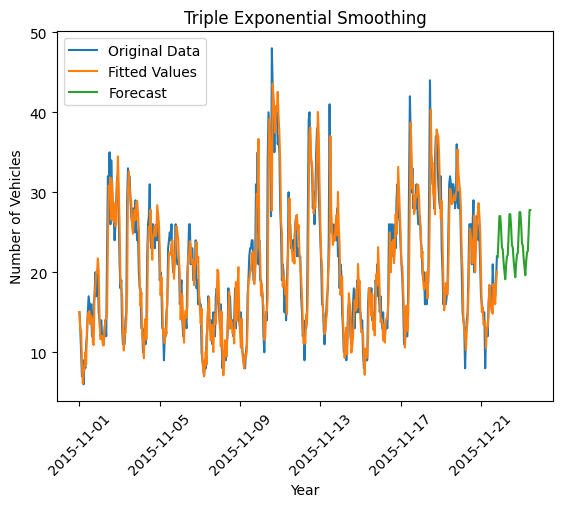

In [70]:
plt.plot(df, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Triple Exponential Smoothing')
plt.xticks(rotation=45)
plt.legend()
plt.show()

##**Well done :)**